In [59]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report,accuracy_score
import matplotlib.pyplot as plt
import os

In [2]:
#Reading data 
data = pd.read_csv('Final_data.csv')

In [33]:
#data.to_csv('Final_data.csv', index=False)
data

,website_name,competence_date,country_code,currency_code,brand,category1_code,category2_code,category3_code,product_code,title,itemurl,imageurl,full_price,price,full_price_eur,price_eur,flg_discount,Category,Group
0,Gucci,2023-11-17,CAN,CAD,GUCCI,MAKE-UP,LIPS,N.A.,6478599PL139216,216 My Cousin Rachel Rouge De Beauté Brillant,https://www.gucci.com/ca/en/pr/beauty/make-up/...,http://media.gucci.com/style/White_South_0_160...,61.0,61.0,41.07,41.07,0,MAKEUP,OTHER
1,Gucci,2023-11-17,CAN,CAD,GUCCI,FINE-JEWELRY,FINE-JEWELRY-FOR-WOMEN,N.A.,702394J85H08268,Gucci Link to Love baguette tourmaline necklace,https://www.gucci.com/ca/en/pr/jewelry-watches...,http://media.gucci.com/style/White_South_0_160...,5630.0,5630.0,3791.24,3791.24,0,ACCESSORIES,WOMEN
2,Gucci,2023-11-17,CAN,CAD,GUCCI,MAKE-UP,FACE,N.A.,7026019PRD99005,05 Gucci Blush De Beauté,https://www.gucci.com/ca/en/pr/beauty/make-up/...,http://media.gucci.com/style/White_South_0_160...,67.0,67.0,45.11,45.11,0,MAKEUP,OTHER
3,Gucci,2023-11-17,CAN,CAD,GUCCI,HANDBAGS,SHOULDER-BAGS-FOR-WOMEN,N.A.,702721U3ZDT3760,Gucci Diana small tote bag,https://www.gucci.com/ca/en/pr/women/handbags/...,http://media.gucci.com/style/White_South_0_160...,5155.0,5155.0,3471.38,3471.38,0,BAGS,WOMEN
4,Gucci,2023-11-17,CAN,CAD,GUCCI,FINE-JEWELRY,FINE-JEWELRY-FOR-WOMEN,N.A.,745649J85008000,Gucci Link to Love double earrings,https://www.gucci.com/ca/en/pr/jewelry-watches...,http://media.gucci.com/style/White_South_0_160...,7670.0,7670.0,5164.98,5164.98,0,ACCESSORIES,WOMEN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28576,Loro Piana,2023-11-17,USA,USD,LORO PIANA,WOMAN,TROUSERS-AND-SHORTS,N.A.,FAN4351,G,https://us.loropiana.com/en/p/woman/trousers-a...,https://media.loropiana.com/HYBRIS/FAN/FAN4351...,9625.0,9625.0,8879.15,8879.15,0,CLOTHING,WOMEN
28577,Loro Piana,2023-11-17,USA,USD,LORO PIANA,WOMAN,ACCESSORIES,HATS,FAN4625,E,https://us.loropiana.com/en/p/woman/accessorie...,https://media.loropiana.com/HYBRIS/FAN/FAN4625...,750.0,750.0,691.88,691.88,0,ACCESSORIES,WOMEN
28578,Loro Piana,2023-11-17,USA,USD,LORO PIANA,WOMAN,LEATHER-GOODS,TOP-HANDLE-AND-TOTES,FAN4833,L,https://us.loropiana.com/en/p/fall-winter/woma...,https://media.loropiana.com/HYBRIS/FAN/FAN4833...,5325.0,5325.0,4912.36,4912.36,0,BAGS,WOMEN
28579,Loro Piana,2023-11-17,USA,USD,LORO PIANA,MAN,KNITWEAR,N.A.,FAN4943,S,https://us.loropiana.com/p/holiday-season/man/...,https://media.loropiana.com/HYBRIS/FAN/FAN4943...,6600.0,6600.0,6088.56,6088.56,0,CLOTHING,MEN


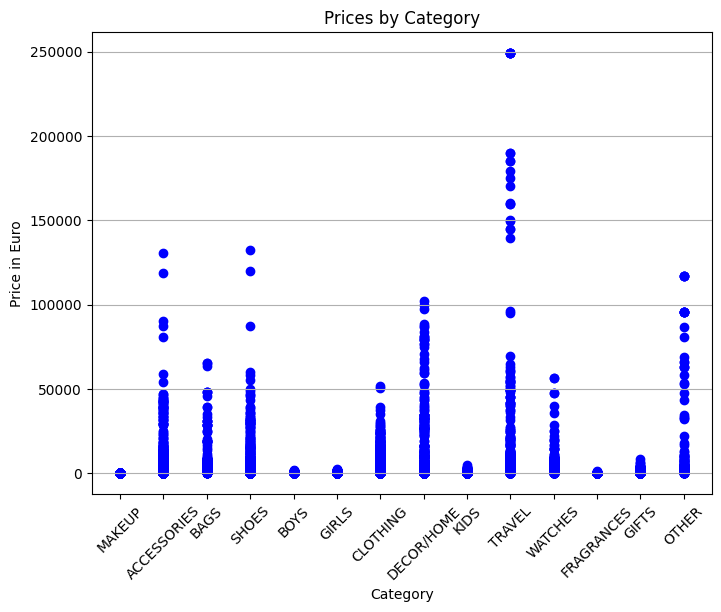

In [38]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Category'], data['full_price_eur'], color='blue')
plt.xlabel('Category')
plt.ylabel('Price in Euro')
plt.title('Prices by Category')
plt.xticks(rotation=45)  # Rotate category labels for better readability
plt.grid(axis='y')  # Add grid lines to the y-axis
plt.show()

In [41]:
data = data[data['full_price_eur'] <= 200000]

In [43]:
#remove outliers
data

,website_name,competence_date,country_code,currency_code,brand,category1_code,category2_code,category3_code,product_code,title,itemurl,imageurl,full_price,price,full_price_eur,price_eur,flg_discount,Category,Group
0,Gucci,2023-11-17,CAN,CAD,GUCCI,MAKE-UP,LIPS,N.A.,6478599PL139216,216 My Cousin Rachel Rouge De Beauté Brillant,https://www.gucci.com/ca/en/pr/beauty/make-up/...,http://media.gucci.com/style/White_South_0_160...,61.0,61.0,41.07,41.07,0,MAKEUP,OTHER
1,Gucci,2023-11-17,CAN,CAD,GUCCI,FINE-JEWELRY,FINE-JEWELRY-FOR-WOMEN,N.A.,702394J85H08268,Gucci Link to Love baguette tourmaline necklace,https://www.gucci.com/ca/en/pr/jewelry-watches...,http://media.gucci.com/style/White_South_0_160...,5630.0,5630.0,3791.24,3791.24,0,ACCESSORIES,WOMEN
2,Gucci,2023-11-17,CAN,CAD,GUCCI,MAKE-UP,FACE,N.A.,7026019PRD99005,05 Gucci Blush De Beauté,https://www.gucci.com/ca/en/pr/beauty/make-up/...,http://media.gucci.com/style/White_South_0_160...,67.0,67.0,45.11,45.11,0,MAKEUP,OTHER
3,Gucci,2023-11-17,CAN,CAD,GUCCI,HANDBAGS,SHOULDER-BAGS-FOR-WOMEN,N.A.,702721U3ZDT3760,Gucci Diana small tote bag,https://www.gucci.com/ca/en/pr/women/handbags/...,http://media.gucci.com/style/White_South_0_160...,5155.0,5155.0,3471.38,3471.38,0,BAGS,WOMEN
4,Gucci,2023-11-17,CAN,CAD,GUCCI,FINE-JEWELRY,FINE-JEWELRY-FOR-WOMEN,N.A.,745649J85008000,Gucci Link to Love double earrings,https://www.gucci.com/ca/en/pr/jewelry-watches...,http://media.gucci.com/style/White_South_0_160...,7670.0,7670.0,5164.98,5164.98,0,ACCESSORIES,WOMEN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28576,Loro Piana,2023-11-17,USA,USD,LORO PIANA,WOMAN,TROUSERS-AND-SHORTS,N.A.,FAN4351,G,https://us.loropiana.com/en/p/woman/trousers-a...,https://media.loropiana.com/HYBRIS/FAN/FAN4351...,9625.0,9625.0,8879.15,8879.15,0,CLOTHING,WOMEN
28577,Loro Piana,2023-11-17,USA,USD,LORO PIANA,WOMAN,ACCESSORIES,HATS,FAN4625,E,https://us.loropiana.com/en/p/woman/accessorie...,https://media.loropiana.com/HYBRIS/FAN/FAN4625...,750.0,750.0,691.88,691.88,0,ACCESSORIES,WOMEN
28578,Loro Piana,2023-11-17,USA,USD,LORO PIANA,WOMAN,LEATHER-GOODS,TOP-HANDLE-AND-TOTES,FAN4833,L,https://us.loropiana.com/en/p/fall-winter/woma...,https://media.loropiana.com/HYBRIS/FAN/FAN4833...,5325.0,5325.0,4912.36,4912.36,0,BAGS,WOMEN
28579,Loro Piana,2023-11-17,USA,USD,LORO PIANA,MAN,KNITWEAR,N.A.,FAN4943,S,https://us.loropiana.com/p/holiday-season/man/...,https://media.loropiana.com/HYBRIS/FAN/FAN4943...,6600.0,6600.0,6088.56,6088.56,0,CLOTHING,MEN


In [44]:
#Features
X =  data[['website_name', 'country_code', 'brand', 'product_code','title', 'Category', 'Group' ]]

#Labels
y = data['full_price_eur']

In [45]:
# Creating a instance of label Encoder.
label_encoder = LabelEncoder()

#convert string features to numeric form
string_features =['website_name', 'country_code', 'brand', 'product_code','title', 'Category', 'Group']

for feature in string_features:
    # Apply LabelEncoder to each string column
    X.loc[:,feature] = label_encoder.fit_transform(X[feature])

X


,website_name,country_code,brand,product_code,title,Category,Group
0,0,0,0,2053,162,9,5
1,0,0,0,3303,4122,0,6
2,0,0,0,3329,60,9,5
3,0,0,0,3346,4037,1,6
4,0,0,0,5620,4132,0,6
...,...,...,...,...,...,...,...
28576,1,2,1,8658,3191,3,6
28577,1,2,1,8703,2665,0,6
28578,1,2,1,8723,4972,1,6
28579,1,2,1,8730,9016,3,4


In [6]:
#function that initialize models
def initializeModels():
    linear_reg = LinearRegression(fit_intercept=True)
    ridge_reg = Ridge()
    knn_reg = KNeighborsRegressor()
    random_forest = RandomForestRegressor()

    return linear_reg, ridge_reg, knn_reg, random_forest

In [7]:
#a function that checks the best parameters for ridge, knn, random_forest
def getBestParams(models, X, y):

    ridge_grid = {'alpha': [0.25, 0.5, 0.75, 0.85]}
    knn_grid = {'n_neighbors': [1, 3, 5, 7]}
    random_forest_grid = {'n_estimators': [50, 100, 150, 200],
      'max_depth': [12, 16, 18, 20],
      'min_samples_leaf': [5, 6, 7, 8]}

    grids = [ridge_grid, knn_grid, random_forest_grid]
    best_params = []

    results = ""

    for i in range(len(models)):
        model = models[i]
        print("Finding best parameters for", model)
        # Use GridSearchCV to search through the parameter grid
        grid_search = GridSearchCV(estimator=model, param_grid=grids[i], cv=3, scoring=['neg_root_mean_squared_error', 'r2'], refit='neg_root_mean_squared_error', verbose=0, n_jobs=-1)
        grid_search.fit(X, y)

        # Print negative RMSE for best parameters for each model
        results += f"Results for {model}:\n"
        results += f"Negative RMS error for {model}: {grid_search.best_score_}\n"

        # Save the best parameters and best score
        best_params.append(grid_search.best_params_)
    
    return best_params, results
  

In [8]:
#define the models with the best parameters found in above function
def defineModels(best_params):
    
    model_linear_regression = make_pipeline(
                       StandardScaler(),
                        LinearRegression(fit_intercept=True))

    model_ridge = make_pipeline(
                          StandardScaler(),
                          Ridge(alpha=best_params[0]['alpha']))
    
    model_knn_neighbours = make_pipeline(
                       StandardScaler(),
                       KNeighborsRegressor(n_neighbors=best_params[1]['n_neighbors']))

    model_random_forest = make_pipeline(
                          StandardScaler(),
                          RandomForestRegressor(n_estimators=best_params[2]['n_estimators'], max_depth=best_params[2]['max_depth'], min_samples_leaf=best_params[2]['min_samples_leaf']))
    
    return model_linear_regression, model_ridge, model_knn_neighbours, model_random_forest



In [17]:
# Evaluate models
def evaluate_models(models, X_train, X_valid, y_train, y_valid, num_test=1, show_progress=False):

    for model in models:
        print(f"Evaluating {model} for {num_test} test(s)...")
        
        mean_sq_error = 0
        coeff_of_deter = 0
        
        for i in range(num_test):
            
            # Train and predict using model
            model.fit(X_train, y_train)
            predictions = model.predict(X_valid)

            # Calculate metrics
            mean_sq_error += (mean_squared_error(y_valid, predictions))

            #0<R^2 <1 indicates the proportion of the variance explained by the model, with higher values indicating a better fit
            coeff_of_deter += (r2_score(y_valid, predictions))

            if(show_progress and i % 20 == 0):
                print(f"\tTest {i} completed")
            
        # Calculate mean of metrics
        # We want low MSE, high R^2
        mean_sq_error /= num_test
        coeff_of_deter /= num_test
        
        print(f"Results for {model}:")
        print(f"\tMean Squared Error: {mean_sq_error}")
        print(f"\tCoefficient of Determination(R^2): {coeff_of_deter}\n")

In [47]:

#call initialize models and store result in models
models = list(initializeModels())

# we don't want to decide parameters to Linear Regression
models.remove(models[0])

print("Finding best parameters...")

#test train split
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2, random_state=None)

#get best parameters by for models and passing training data
best_params, results = getBestParams(models, X_train, y_train)
results += "\n"

for i in range(len(models)):
  results += f"{models[i]}: {best_params[i]}\n"

  print(results)
    

Finding best parameters...
Finding best parameters for Ridge()
Finding best parameters for KNeighborsRegressor()
Finding best parameters for RandomForestRegressor()
Results for Ridge():
Negative RMS error for Ridge(): -6549.591257148163
Results for KNeighborsRegressor():
Negative RMS error for KNeighborsRegressor(): -5672.604849912125
Results for RandomForestRegressor():
Negative RMS error for RandomForestRegressor(): -4801.303550364627

Ridge(): {'alpha': 0.85}

Results for Ridge():
Negative RMS error for Ridge(): -6549.591257148163
Results for KNeighborsRegressor():
Negative RMS error for KNeighborsRegressor(): -5672.604849912125
Results for RandomForestRegressor():
Negative RMS error for RandomForestRegressor(): -4801.303550364627

Ridge(): {'alpha': 0.85}
KNeighborsRegressor(): {'n_neighbors': 3}

Results for Ridge():
Negative RMS error for Ridge(): -6549.591257148163
Results for KNeighborsRegressor():
Negative RMS error for KNeighborsRegressor(): -5672.604849912125
Results for Ran

In [48]:
#Results of the best parameters got after running above
print("Using best parameters learnt beforehand...")
best_params = [{'alpha': 0.85},
    {'n_neighbors': 3},
   {'max_depth': 18, 'min_samples_leaf': 5, 'n_estimators': 50}]
print(best_params)


Using best parameters learnt beforehand...
[{'alpha': 0.85}, {'n_neighbors': 3}, {'max_depth': 18, 'min_samples_leaf': 5, 'n_estimators': 50}]


### Mean Squared Error represents the average of the squared difference between the original and predicted values in the data set. It measures the variance of the residuals.

### 0<R^2 <1 indicates the proportion of the variance explained by the model. Value close to 1 means better fit

In [49]:
#run the model for 20 times
n = 20
models = defineModels(best_params)
evaluate_models(models, X_train, X_valid, y_train, y_valid, n)


Evaluating Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())]) for 20 test(s)...
Results for Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())]):
	Mean Squared Error: 50725332.2533156
	Coefficient of Determination(R^2): 0.01726925752688091

Evaluating Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=0.85))]) for 20 test(s)...
Results for Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=0.85))]):
	Mean Squared Error: 50725012.67583061
	Coefficient of Determination(R^2): 0.017275448883450895

Evaluating Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor(n_neighbors=3))]) for 20 test(s)...
Results for Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor(n_neighbo

In [68]:
# Clearly, the best model is the Random Forest Regressor

print("Results for Random Forest Regressor...")
random_forest_regressor = models[3]

y_pred = random_forest_regressor.predict(X_valid)
   
results = X_valid.copy()
results['full_price_euro'] = y_valid
results['full_price_euro_predicted'] = y_pred

results

Results for Random Forest Regressor...


,website_name,country_code,brand,product_code,title,Category,Group,full_price_euro,full_price_euro_predicted
982,0,0,0,2975,8833,3,6,4511.78,2786.120725
6027,0,2,0,4092,3948,1,6,1537.74,3213.330744
14868,2,0,2,15194,899,3,6,1508.41,2578.499234
10241,0,2,0,601,8246,0,6,428.70,433.590228
16197,2,0,2,17988,4365,12,6,4309.76,3699.264845
...,...,...,...,...,...,...,...,...,...
1285,0,0,0,6349,10695,11,6,1259.25,1073.248538
20794,2,1,2,12837,2167,12,5,60000.00,42899.822603
11363,2,0,2,13219,6086,0,6,1299.66,784.994194
2238,0,0,0,2491,8214,0,6,538.72,468.918951


In [69]:
#r2_score
r_squared = r2_score(y_valid, y_pred)
print("Coefficient of Determination (R^2):", r_squared)

Coefficient of Determination (R^2): 0.5474632995470778


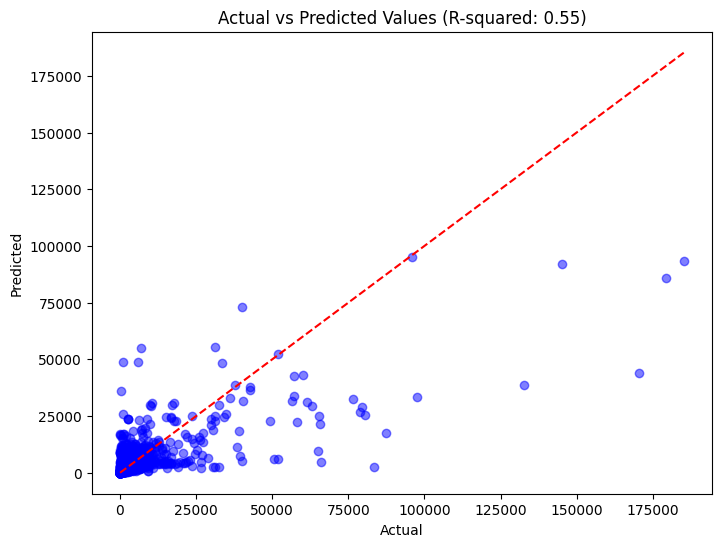

In [70]:
# Assuming y_valid and y_pred are your actual and predicted values respectively
# Plot the actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_valid, y_pred, color='blue', alpha=0.5)  # Scatter plot of actual vs. predicted
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], color='red', linestyle = '--')  # Diagonal line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Actual vs Predicted Values (R-squared: {r_squared:.2f})')
plt.show()